## Dependencies and Setup

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import sem

In [2]:
# Set path for data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read in mouse and study results data
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)

# Merge data into single dataset
combined_data = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID')
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Check for the number of unique mice
combined_unique_mice_count = len(combined_data['Mouse ID'].unique())
combined_unique_mice_count

249

In [4]:
# Find the duplicate mice by ID number that show up for mouse ID and timepoint
# Researched on stack overflow about a .duplicated function
duplicate_search = combined_data[combined_data.duplicated(subset = ['Mouse ID','Timepoint'])]
duplicate_id = duplicate_search['Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [5]:
# Find data for the duplicate mouse ID
duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID'] == 'g989',:]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean dataframe by dropping the duplicate mouse by the ID
# I had initially done a .loc in order to filter specifically for mouse g989. However, creating a dynamic filter using the .isin function
cleaned_data = combined_data.loc[combined_data['Mouse ID'].isin(duplicate_id) == False]
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Check for the number of unique mice
clean_unique_mice_count = len(cleaned_data['Mouse ID'].unique())
clean_unique_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_grouped = cleaned_data.groupby('Drug Regimen')
mean_tumor_volume = drug_regimen_grouped['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_regimen_grouped['Tumor Volume (mm3)'].median()
tumor_volume_variance = drug_regimen_grouped['Tumor Volume (mm3)'].var()
tumor_volume_std = drug_regimen_grouped['Tumor Volume (mm3)'].std()
tumor_volume_SEM = drug_regimen_grouped['Tumor Volume (mm3)'].sem()

# Place the data (series) into dataframe
summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                                   'Median Tumor Volume': median_tumor_volume,
                                   'Tumor Volume Variance': tumor_volume_variance,
                                   'Tumor Volume Std. Dev.': tumor_volume_std,
                                   'Tumor Volume Std. Err.': tumor_volume_SEM
                                  })
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate the same summary statistics table using a method to produce everything with a single grouby function
# Looked up .agg on stack overflow in order to achieve this for a single grouby function

single_groupby_summary_statistics = drug_regimen_grouped.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
single_groupby_summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Get a value count for the amount of trials ran for each drug
count_of_trials = cleaned_data['Drug Regimen'].value_counts()
sorted_count_of_trials = count_of_trials.sort_values(ascending = False)
sorted_count_of_trials

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

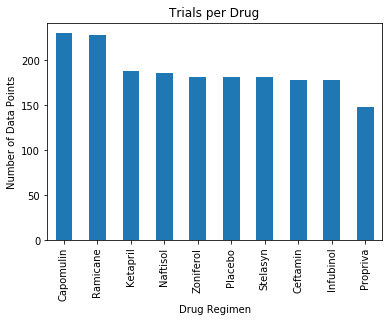

In [11]:
# Generate a bar plot showing the total number of mice for each treatment using pandas
trials_per_drug = sorted_count_of_trials.plot(kind = 'bar', figsize = (6,4))
trials_per_drug.set_title('Trials per Drug')
trials_per_drug.set_xlabel('Drug Regimen')
trials_per_drug.set_ylabel('Number of Data Points')
plt.show()

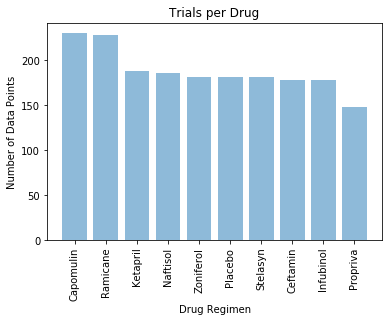

In [12]:
# Generate a bar plot this time showing the exact same data using pyplots
drugs = sorted_count_of_trials.index
data = sorted_count_of_trials.values
x_axis = np.arange(len(count_of_trials))
plt.bar(x_axis, data, alpha = 0.5, align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation = 'vertical')
plt.title('Trials per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

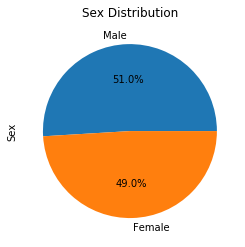

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = cleaned_data['Sex'].value_counts()
sex_count.plot(kind = 'pie',autopct = '%1.1f%%',startangle = 0, title = 'Sex Distribution')
plt.show()

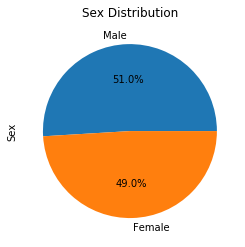

In [14]:
# Generate the same data using pyplot
labels = sex_count.index
plt.pie(sex_count,labels = labels,autopct = '%1.1f%%',startangle = 0 )
plt.title('Sex Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers, and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens
id_grouped = cleaned_data.groupby('Mouse ID')
last_timepoint = id_grouped['Timepoint'].max()
# reset_index so that when we make a future calculation the index shows up correctly
final_tumor_vol_data = last_timepoint.reset_index()
# Merge this data frame with the original cleaned dataframe to get tumor volume at last timepoint.
new_cleaned_data = pd.merge(final_tumor_vol_data, cleaned_data, how = 'left', on = ['Mouse ID','Timepoint'])
new_cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put 4 treatment names into a list for use with a for loop
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create an empty list to fill with tumor volume data
tumor_vol_list = []
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    drug_tumor_data = new_cleaned_data.loc[new_cleaned_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(drug_tumor_data)
    # For each treatment in the list, calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = drug_tumor_data.quantile([.25,.5,.75])
    lower_quartiles = quartiles[0.25]
    upper_quartiles = quartiles[0.75]
    iqr = upper_quartiles-lower_quartiles
    lower_bound = lower_quartiles - (1.5*iqr)
    upper_bound = upper_quartiles + (1.5*iqr)
    # place conditional filter that would check if any values fell into the ranges specified
    tumor_outlier = drug_tumor_data[(drug_tumor_data > upper_bound) | (drug_tumor_data < lower_bound)]
    print(f"{drug}'s potential outliers: {tumor_outlier}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


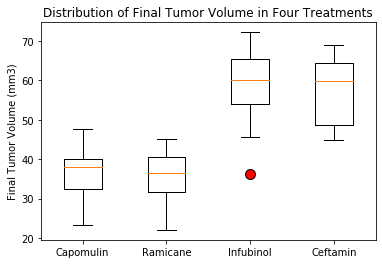

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens
x_axis = tumor_vol_list
plt.title('Distribution of Final Tumor Volume in Four Treatments')
plt.ylabel('Final Tumor Volume (mm3)')
# Looked up flierprops on stack overflow in order to adjust marker features
flierprops = dict(marker = 'o', markerfacecolor= 'Red', markeredgecolor = 'Black', markersize = 10)
plt.boxplot(x_axis,labels = treatment_list, flierprops = flierprops)
plt.show()

## Line and Scatter Plots

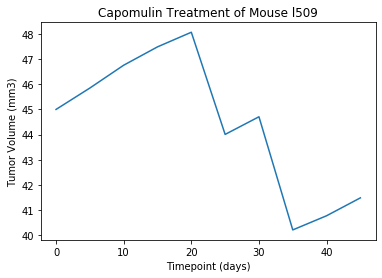

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = cleaned_data.loc[cleaned_data['Drug Regimen'] =='Capomulin']
# Example uses mouse l509
capomulin_specific_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']
x_axis = capomulin_specific_mouse['Timepoint']
y_axis = capomulin_specific_mouse['Tumor Volume (mm3)']
plt.plot(x_axis,y_axis)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

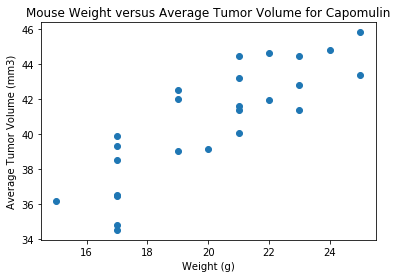

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Zach explained that we can take the mean at this point because it won't affect the weight column due to it being static
grouped_capomulin_mice = capomulin_df.groupby('Mouse ID').mean()
x_axis = grouped_capomulin_mice['Weight (g)']
y_axis = grouped_capomulin_mice['Tumor Volume (mm3)']
plt.title('Mouse Weight versus Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis)
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


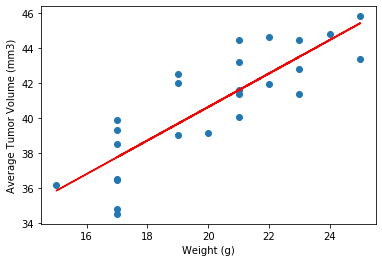

In [22]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
print(f'The correlation between mouse weight and average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
plt.show()

## Observations and Insights

1.) When taking a look at the four treatment drugs that were used for the experiment, Capomulin and Ramicane both exhibited a lower range of Final Tumor Volumes (mm3) than Infubinol (with the exception of the outlier) and Ceftamin (Distribution of Final Tumor Volume in Four Treatments). While this may be due to the sample sizes between these two sets of drugs (varying roughly by 50 units) (Trial per Drug), there is still on average about a 20 (mm3) difference in the sizes of the final tumor volume.

2.) When taking a look at the average tumor volume when compared to the varying mice weights, we see that there is a positive correlation between these two variables. As the tumor volume increases in size, the general trend is that the mice weights will increase as well. This is further supported by pearson r value of .84 (Mouse Weight versus Average Tumor Volume for Capomulin).

3.) The last thing to note is that there was a duplicated mouse data for unit g989, which tested under drug regimen Propriva. This mouse was removed from the data set altogether because it had the potential to skew the values for that given drug and generate results that may mislead the report.